In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf

In [9]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

In [14]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-4))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 45111169024.0000 - val_loss: 56072.8047
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 51619624.0000 - val_loss: 59341.9414
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 55226.3555 - val_loss: 51322.8047
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 47761.9609 - val_loss: 44387.4180
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 41306.4883 - val_loss: 38389.3633
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 35723.5430 - val_loss: 33201.9062
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 30895.2305 - val_loss: 28715.5332
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 26719.5059 - val_loss: 24835.4414
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 23108.1523 - val_loss: 21479.7207
Epoch 10/20
363/363

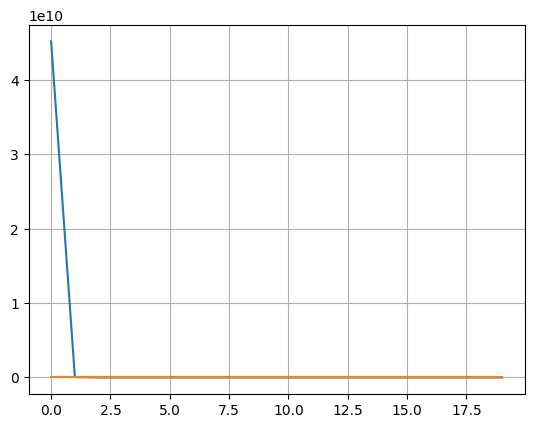

In [15]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.show()

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

model_scaled = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model_scaled.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-4))
history_scaled = model_scaled.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test_scaled = model_scaled.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred_scaled = model_scaled.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 4.8413 - val_loss: 5.3513
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 3.4223 - val_loss: 2.9366
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 2.5346 - val_loss: 2.0345
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 1.9666 - val_loss: 1.7391
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 1.5957 - val_loss: 1.6582
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 1.3481 - val_loss: 1.6316
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 1.1793 - val_loss: 1.5967
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 1.0617 - val_loss: 1.5255
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9776 - val_loss: 1.4357
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9143 - val_loss: 1.3366

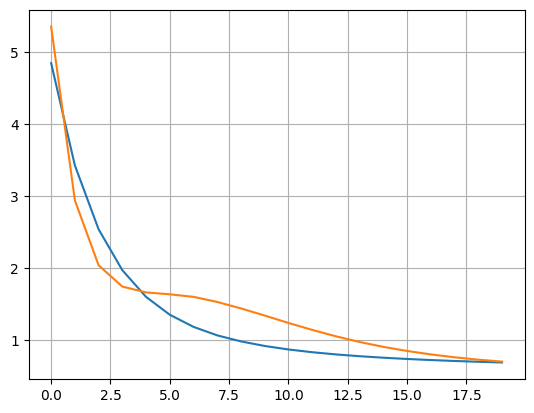

In [18]:
plt.plot(pd.DataFrame(history_scaled.history))
plt.grid(True)
plt.show()

# Dane zawsze muszą być przeskalowane